<div style="text-align: center;">
   <font size="5"> 2023年度　数式処理演習　最終個別試験問題 </font>
</div>
   <div style="text-align: right;">
   <font size="3"> cc by Shigeto R. Nishitani, 2023/12/21実施 </font>
</div>

- file: ~/symbolic_math/exams_23/23_final_ans.ipynb
- make problem: pick_works_from_ans 23_final_ans.ipynb -1 '' '24, 34'

以下の問題を python で解き，LUNA へ提出せよ．LUNA へは ipynb と pdf 形式の２種類を提出すること．


# 問１　微積分

## 正規分布(15 点)
次の正規分布関数(ガウス函数)
$$
y = \frac{1}{\sqrt{2\pi\sigma^2} } 
\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$
を
$$
\mu, \sigma = 0, 1 \\\\
\mu, \sigma = 0, 2 \\\\
\mu, \sigma = -1, 2 \\\\
$$
について， 　x=np.linspace(-5, 5, 41)でプロットせよ．

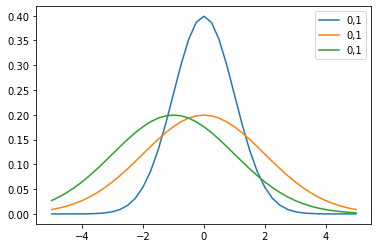

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gauss(x, mu, s):
    return 1/np.sqrt(2*np.pi*s**2) * np.exp( -(x-mu)**2/(2*s**2) )

x=np.linspace(-5, 5, 41)
plt.plot(x, gauss(x, 0, 1),label='0,1')
plt.plot(x, gauss(x, 0, 2),label='0,1')
plt.plot(x, gauss(x, -1,2),label='0,1')
plt.legend()

## ガウス函数の積分(15 点)

$$
\mu, \sigma = 0, 1 \\\\
$$
の正規分布から無作為標本 $x$ を取ると、
平均$\mu$ からのずれが $\pm 1\sigma$ 以下の範囲に 
$x$ が含まれる確率は 68.27%,
 $\pm 2\sigma$ 以下だと 95.45%, 
さらに  $\pm 3\sigma$ だと 99.73% となることを確かめよ．

In [2]:
from sympy import *
x = symbols('x')

g=1/sqrt(2*pi*1**2) * exp( -(x-0)**2/(2*1**2) )
print("sigma: ", 1, ", 積分値: " ,integrate(g, (x, -1,1)).evalf())
print("sigma: ", 2, ", 積分値: " ,integrate(g, (x, -2, 2)).evalf())
print("sigma: ", 3, ", 積分値: " ,integrate(g, (x, -3,3)).evalf())

sigma:  1 , 積分値:  0.682689492137086
sigma:  2 , 積分値:  0.954499736103642
sigma:  3 , 積分値:  0.997300203936740


# 問２　線形代数

## 2(a) 標準偏差(15 点)

次のデータ

```
x = [0.1, -0.2, 0.4]

```
に対して，平均(average)$\mu$ と標準偏差(standard deviation)$\sigma$ 
$$
\mu = \frac{1^{\rm T} x}{n} \\\\
\sigma = \frac{||x - \mu 1 || }{\sqrt{n}}
$$

をベクトルの内積を使って求めよ．
ただし，$n$はベクトルのサイズを，
$1$は全ての要素が$1$のベクトルを，
$|| x ||$は$x$ のユークリッドノルムを意味する．

さらに，$x$の要素の2乗平均平方根(root-mean-square, RMS)は，
$$
{\rm rms}(x) = \sqrt{\frac{x_1^2+\cdots+x_n^2}{n}} = \frac{||x||}{\sqrt{n}}
$$

で求められる．
rms($x$)の2乗（2乗平均）は，　平均値(avg($x$))の2乗と標準偏差(std($x$))の2乗の和
$$
{\rm rms}(x)^2 = {\rm avg}(x)^2 + {\rm std}(x)^2
$$

で表されることを確かめよ．

In [3]:
import numpy as np

xdata = np.array([0.1, -0.2, 0.4])
nn = xdata.size
one = np.full(nn, 1.0)
avg = one.transpose().dot(xdata)/nn
print("avg: ", avg)
dx = xdata - avg*one
std = sqrt(dx.transpose().dot(dx))/np.sqrt(nn)
print("std: ", std)

avg:  0.10000000000000002
std:  0.244948974278318


In [4]:
xdata = np.array([0.1, -0.2, 0.4])
print("rms^2: ", xdata.transpose().dot(xdata)/nn)
print("avg^2+std^2: ", avg**2+std**2)

rms^2:  0.07000000000000002
avg^2+std^2:  0.0700000000000000


## グラムシュミット(15 点)

グラム・シュミット法のアルゴリズムは次のとおりである．

入 力 : $n$次元ベクトル$a_1\ldots a_k$

$i=1\ldots k$について
- step1. 直交化: $\tilde{q}_i = a_i -(q_1^{\rm T}a_i)q_1- \cdots - (q_{i-1}^{\rm T}a_i)q_{i-1}. $
- step2. 線形従属かどうかのテスト:$\tilde{q}_i =0$ ならば終了.
- step3. 正規化: $q_i = \tilde{q}_i/|| \tilde{q}_i ||$

以下の$a_1, a_2, a_3$に対してグラム・シュミット法を適用し，
正規直交基底を作成せよ．
$$
a_1=\left(
    \begin{array}{@{\,}c@{\,}}
      1 \\
      0 \\
      0
    \end{array}
    \right),~
a_2=\left(
    \begin{array}{@{\,}c@{\,}}
   1\\
    1\\
    0
    \end{array}
    \right),~
a_3=\left(
    \begin{array}{@{\,}c@{\,}}
     1\\
     1\\
     1
    \end{array}
    \right)
$$

また，$q_1, q_2, q_3$が互いに直交していることを確認せよ．

In [5]:
import numpy as np

a1 = np.array([1,0,0])
a2 = np.array([1,1,0])
a3 = np.array([1,1,1])
q1h=a1
q1=q1h/q1h.transpose().dot(q1h)
print("q1: ", q1)
q2h=a2-(q1.transpose().dot(a2))*q1
q2=q2h/q2h.transpose().dot(q2h)
print("q2: ", q2)
q3h=a3-(q1.transpose().dot(a3))*q1-(q2.transpose().dot(a3))*q2
q3=q3h/q3h.transpose().dot(q3h)
print("q3: ", q3)
print("q1.q2: ", q1.dot(q2))
print("q2.q3: ", q2.dot(q3))
print("q3.q1: ", q3.dot(q1))

q1:  [1. 0. 0.]
q2:  [0. 1. 0.]
q3:  [0. 0. 1.]
q1.q2:  0.0
q2.q3:  0.0
q3.q1:  0.0


# 問3 センター試験(20 点)
2021年度：数学II・B/本試験(第一日程) 改

## ２次関数の場合
### 特定(specific)の場合
座標平面上で，次の二つの2 次関数のグラフについて考える．
$$
y=3x^2+2x+3 \ldots (1) \\\\
y=2x^2+2x+3 \ldots (2)
$$
(1)，(2)の2次関数のグラフには次の共通点がある．

共通点
- $y$ 軸との交点の$y$ 座標は$\fbox{ ア }$ である．
- $y$ 軸との交点における接線の方程式は
  $y = \fbox{ イ } x+ \fbox{ ウ }$ である．

次の1. ~ 6.の2次関数のグラフのうち，
$y$ 軸との交点における接線の方程式
が$y = \fbox{ イ } x+ \fbox{ ウ }$ となるものは
$\fbox{ エ }$ である．

$\fbox{ エ }$ の解答群
1. $y = 3x^2 -2x -3$
1. $y = -3x^2 +2x -3$
1. $y = 2x^2 +2x -3$
1. $y = 2x^2 -2x +3$
1. $y = -x^2 +2x +3$
1. $y = -x^2 -2x -3$



In [6]:
from sympy import *
x = symbols('x')
y1=3*x**2+2*x+3
bb =  y1.subs(x, 0)
print("ア: ",bb)

ア:  3


In [7]:
aa = diff(y1,x).subs(x,0)
print("イ: ",aa)
print("ウ: ",bb)
aa*x+bb

イ:  2
ウ:  3


2*x + 3

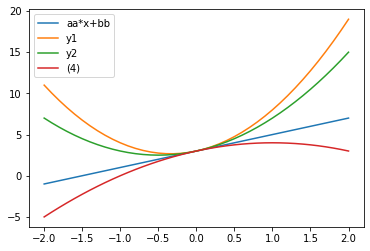

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xx=np.linspace(-2,2, 41)
plt.plot(xx, aa*xx+bb,label='aa*x+bb')
plt.plot(xx,3*xx**2+2*xx+3,label='y1')
plt.plot(xx, 2*xx**2+2*xx+3,label='y2')
plt.plot(xx, -xx**2+2*xx+3,label='(4)')
plt.legend()


### 一般的(general)な場合
$a,b,c$を0でない実数とする．

曲線$y=ax^2+bx+c$
上の点(0，$\fbox{ オ }$ )に
おける接線を$l$とすると，
その方程式は$y=\fbox{ カ }x+ \fbox{ キ }$である．

接線$l$と$x$軸との交点の$x$ 座標は
$\frac{\fbox{ クケ }}{\fbox{ コ }}$ である．

$a,b,c$が正の実数であるとき，
曲線$y=ax^2+bx+c$と接線$l$をおよび
直線$x=\frac{\fbox{ クケ }}{\fbox{ コ }}$ で囲まれた図形の面積を$S$とすると
$$
S= \frac{ac^\fbox{ サ }}{\fbox{ シ }b^\fbox{ ス }}
$$
である．

(3)において，$a=1$ とし，
$S$ の値が一定となるように正の実数$b,c$の値を変化させる．
このとき，$b$ と$c$ の関係を表すグラフの概形は
$\fbox{ セ }$である．

$\fbox{ セ }$については，最も適当なものを，次の
(0)から(5)のうちから一つ選べ.

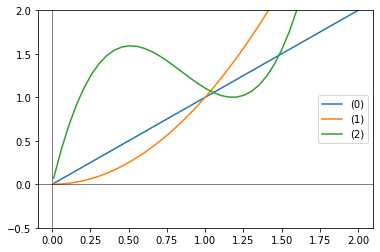
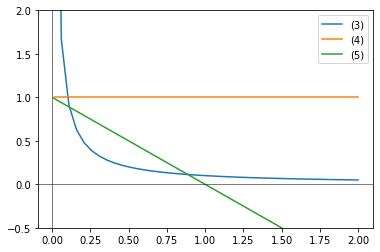

In [9]:
from sympy import *
a,b, c, x = symbols('a,b,c x')

y1=a*x**2+b*x+c
b2 =  y1.subs(x, 0)
print("オ: ",b2)

オ:  c


In [10]:
a2 = diff(y1,x).subs(x,0)
print("カ: ",a2)
print("キ: ",b2)
y2=a2*x+b2
print(y2)

カ:  b
キ:  c
b*x + c


In [11]:
print("クケコ: ", solve(a2*x+b2,x))

クケコ:  [-c/b]


In [12]:
SS=integrate(y1-y2,(x, -c/b, 0))

In [13]:
SS

a*c**3/(3*b**3)

In [14]:
print("サシス: ", SS)

サシス:  a*c**3/(3*b**3)


In [15]:
s1=solve(SS.subs(a,1)-1,c)
s1[0]

3**(1/3)*b

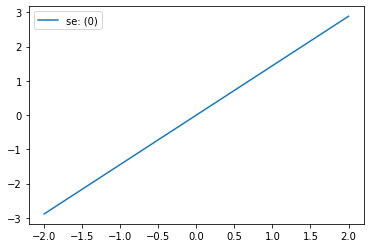

In [16]:
bb=np.linspace(-2,2, 41)
plt.plot(bb, 3**(1/3)*bb, label='se: (0)')
plt.legend()

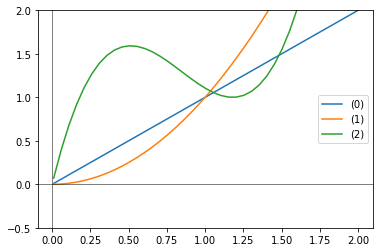

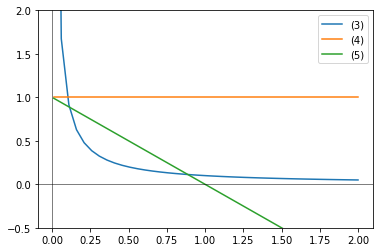

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def show_plot(plt):
    plt.axhline(0, color='black', linewidth=.5)
    plt.axvline(0, color='black', linewidth=.5)
    plt.ylim(-0.5, lim)
    plt.legend()
    plt.show()
def func(x):
    return 4*x*(x-1)**2+1

lim = 2
xx=np.linspace(0.01, lim, 41)
dx=0.5
plt.plot(xx, xx,label='(0)')
plt.plot(xx,xx**2,label='(1)')
plt.plot(xx, func(xx-0.1796520430),label='(2)')
show_plot(plt)
plt.plot(xx, 0.1/xx,label='(3)')
yy=np.linspace(1, 1, 41)
plt.plot(xx, yy,label='(4)')
plt.plot(xx, -xx+1,label='(5)')
show_plot(plt)

## ３次関数の場合
### 特定(specific)の場合
座標平面上で，次の三つの3次関数のグラフについて考える．
$$
y=4x^3+2x^2+3x+5  \ldots (4) \\\\
y=-2x^3+7x^2+3x+5  \ldots (5) \\\\
y=5x^3-x^2+3x+5  \ldots (6)
$$

(4)，(5)，(6)の3次関数のグラフには次の共通点がある．

共通点
- $y$ 軸との交点の$y$ 座標は$\fbox{ ソ }$ である．
- $y$ 軸との交点における接線の方程式は
  $y = \fbox{ タ } x+ \fbox{ チ }$ である．


In [18]:
x = symbols('x')
y1=4*x**3+2*x**2+3*x+5
bb =  y1.subs(x, 0)
print("ソ: ",bb)

ソ:  5


In [19]:
aa = diff(y1,x).subs(x,0)
print("タチ: ",aa*x+bb)


タチ:  3*x + 5



### 一般的(general)な場合
$a, b, c, d$ を0でない実数とする．

曲線$y=ax^3+bx^2+cx+d$ 上の点(0, $\fbox{ ツ }$)
における接線の方程式は
$y = \fbox{ テ } x+ \fbox{ ト }$
である．

次に，$f(x)=ax^3+bx^2+cx+d, g(x) = \fbox{ テ } x+ \fbox{ ト }$  とし，
$f(x)-g(x)$ について考える．

$h(x)=f(x)-g(x)$ とおく．
$a, b, c, d$ が正の実数であるとき，
$y=h(x)$ のグラフの概形は$\fbox{ ナ }$である．

$y=f(x)$ のグラフと$y=g(x)$ のグラフの共有点の$x$ 座標は
$\frac{\fbox{ ニヌ }}{\fbox{ ネ }}$
と$\fbox{ ノ }$ である．
また．
$x$ が
$\frac{\fbox{ ニヌ }}{\fbox{ ネ }}$
と$\fbox{ ノ }$ 
の間を動くとき，
$\left|f(x)-g(x)\right|$の値が最大となるのは，
$x=\frac{\fbox{ ハヒフ }}{\fbox{ ヘホ }}$のときである．

$\fbox{ ナ }$については，最も適当なものを，次の(0)~(5)のうちから一つ選べ．
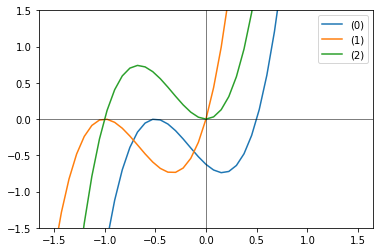
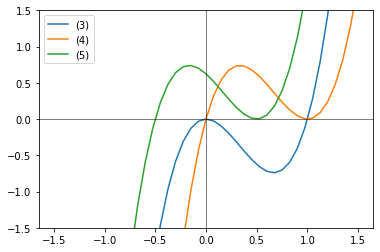

In [20]:
a,b,c,d,x = symbols('a b c d x')
y1=a*x**3+b*x**2+c*x+d
bb =  y1.subs(x, 0)
print("ツ: ",bb)

ツ:  d


In [21]:
aa = diff(y1,x).subs(x,0)
print("テト: ",aa*x+bb)

テト:  c*x + d


In [22]:
ff = y1
gg = aa*x+bb
hh = ff-gg
print(hh)

a*x**3 + b*x**2


In [23]:
solve(hh, x)

[0, -b/a]

In [24]:
s2=solve(diff(hh,x),x)
print(s2)

[0, -2*b/(3*a)]


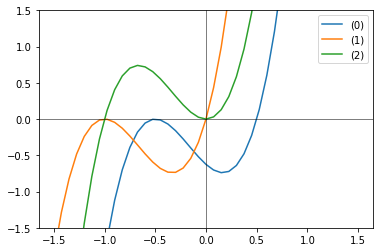

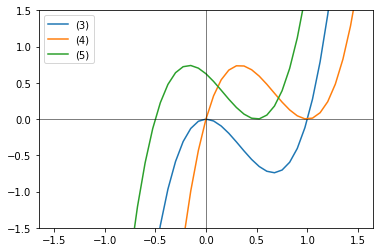

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def show_plot(plt):
    plt.axhline(0, color='black', linewidth=.5)
    plt.axvline(0, color='black', linewidth=.5)
    plt.ylim(-lim, lim)
    plt.legend()
    plt.show()
def func(x, x0, x1, x2):
    return 5*(x-x0)*(x-x1)*(x-x2)

lim = 1.5
xx=np.linspace(-lim, lim, 41)
dx=0.5
plt.plot(xx, func(xx, -dx, -dx, dx),label='(0)')
plt.plot(xx, func(xx, -1,-1,0),label='(1)')
plt.plot(xx, func(xx, -1, 0,0),label='(2)')
show_plot(plt)
plt.plot(xx, func(xx, 0,0,1),label='(3)')
plt.plot(xx, func(xx,0,1,1),label='(4)')
plt.plot(xx, func(xx, -dx, dx, dx),label='(5)')
show_plot(plt)

# 問4 数値改変(20点)
問３において，
$$
f(x)=2.5x^3+5.4x^2+6.3x+5.3
$$
として，　$\left| f(x) -g(x) \right|$の値が最大になるのは，
$x=\frac{\fbox{ ハヒフ }}{\fbox{ ヘホ }}$のときであることを，
グラフをプロットして確かめよ．

In [26]:
x = symbols('x')
a0, b0, c0, d0 = 2.5, 5.4, 6.3, 5.3
ff=a0*x**3+b0*x**2+c0*x+d0
bb =  ff.subs(x, 0)
print("ソ: ",bb)

ソ:  5.30000000000000


In [27]:
aa = diff(ff,x).subs(x,0)
print("テト: ",aa*x+bb)

テト:  6.3*x + 5.3


In [28]:
y3=-2*b0/(3*a0)
print(y3)

-1.4400000000000002


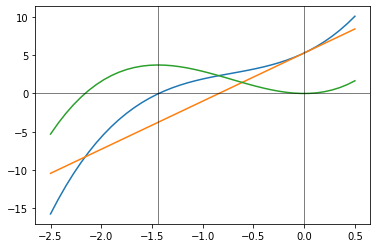

In [29]:
x2=np.linspace(-2.5, 0.5, 41)

fx = a0*x2**3+b0*x2**2+c0*x2+d0
plt.plot(x2, fx ,label='(0)')
plt.plot(x2, aa*x2+bb,label='(0)')
plt.plot(x2, fx- (aa*x2+bb),label='(0)')
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.axvline(y3, color='black', linewidth=.5)